## 知识点

### 一、生成词向量
>1、词袋模型与n-gram模型原理
2、tf-idf中n-gram的使用

### 二、建立训练测试集
>1、训练测试集如何划分

### 三、训练模型
>1、LR及多分类模型原理（输入输出及中间参数）
2、优化策略的选择，三种梯度下降的原理及比较

### 四、模型评价
>1、评价指标的选择

### 五、特征选择
>1、如何挑选特征

### 一、词向量的生成

### 1.1 词袋模型

文本表示有离散表示和分布式表示，词袋模型属于前者，其只考虑单词是否出现以及单词出现的频率，而未考虑单词的上下文关系，舍去了总体结构。

词袋向量是词语颗粒度上的频次或 TF-IDF 向量，前者只考虑了单词的出现次数TF，后者引入了IDF，即单词在所有文本中的出现的次数，可以帮助过滤掉一些功能词如the、a以及on等。假设单词有V个，则词向量为V×1维，每一行的值为该单词的TF值或TF-IDF值。

### 1.2 n-gram模型

Markov models are the class of probabilistic models that assume we can predict the probability of some future unit without looking too far into the past.

Language models，Models that assign probabilities to sequences of words simplest model that assigns probabilities to sentences and sequences of words, the n-gram. drop the word “model”, and thus the term ngram is used to mean either the word sequence itself or the predictive model that assigns it a probability。

An intuitive way to estimate probabilities is called maximum likelihood estimation or MLE. 
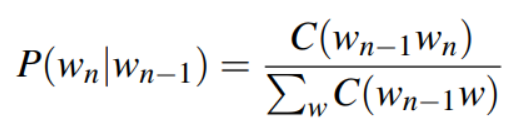



### 1.3 n-gram与词袋模型

n-gram = a feature, BOW = a representation of a text using 1-gram contained in it.Most of the times, 2-gram or 3-gram may capture more information than a 1-gram. if you try to classify text to know people taste, it may not be enough to use 1-gram.——来自quora


例如：

我早饭吃得超好

{我，我早，早，早饭，饭，饭吃，吃，吃得，得，得超，超，超好，好}
如果是1-gram得到的字典长为7，而2-gram则会翻倍。

#### 问题：可是它连n-gram模型依靠的假设都没用到，不过是用多个单词来表示文本也算是用到n-gram模型吗

#### 回答：词袋模型自身基于的假设是字与字之间是相互独立的，因此n-gram的假设是有用到的

In [5]:
### BOW代码实现
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    "John likes to watch movies, Mary likes movies too",
    "John also likes to watch football games",
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())


In [ ]:
### TF-IDF代码实现
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X)
print(X.toarray())


### 二、建立训练测试集

训练集由测试集和验证集组成，常见划分方式有：

留一验证：十份中拿九份去训练，另外一份留作验证
K折交叉验证：常用十折交叉验证，即进行十次的留一验证，使得每个样本都被训练过也被测试过


Test set creates another problem: in order to save lots of data for training, the test set (or devset) might not be large enough to be representative. It would be better if we could somehow use all our data both for training and test. We crossvalidation do this by cross-validation.

The only problem with cross-validation is that because all the data is used for testing, we need the whole corpus to be blind; we can't examine any of the data to suggest possible features and in general see what's going on.


### 三、训练模型

#### 3.1 Logistic Regression vs NB
logistics更具有鲁棒性，而且能通过weight值减缓变量之间相关性的影响。但是朴素贝叶斯的独立性假设过于严苛，对于一些不符合假设的样本而言容易过拟合。但是它在小样本上表现优越并且训练速度快

Naive Bayes has overly strong conditional independence assumptions.Thus when there are many correlated features, logistic regression will assign
a more accurate probability than naive Bayes. So logistic regression generally works
better on larger documents or datasets and is a common default.

Naive Bayes can work extremely well (some
times
even better than logistic regression) on very small datasets (Ng and Jordan,
2002) or short documents (Wang and Manning, 2012). Furthermore, naive Bayes is
easy to implement and very fast to train (there's no optimization step). So it is still a
reasonable approach to use in some situations.

#### 3.1 Logistic Regression
In natural language processing, logistic regression is the baseline supervised machine learning algorithm for classification

我们需要模型具有可解释性，而logistics能够通过假设检验来验证一个特征是否重要并且它是如何影响结果（权重）。它除了具有可解释性外，还可以作为一个探索变量重要性的分析工具。logistic regression in NLP and many other fields is widely used as an analytic tool for testing hypotheses about the effect of various explanatory variables (features).

输入，对于输入向量的要求


分类函数：


损失函数：cross-entropy
The negative log of this probability is a convenient loss metric since it goes
from 0 (negative log of 1, no loss) to infinity (negative log of 0, infinite loss). This
loss function also ensures that as the probability of the correct answer is maximized,
the probability of the incorrect answer is minimized; since the two sum to one, any
increase in the probability of the correct answer is coming at the expense of the incorrect
answer.虽然两者都有同样正确的分类预测结果。平方损失则过于严格

优化策略：
For logistic regression, this loss function is conveniently convex. A convex function
has just one minimum; there are no local minima to get stuck in, so gradient
descent starting from any point is guaranteed to find the minimum.

随机梯度下降，是每次随机抽取一个样本，计算梯度并更新参数 batch-training是直接在所有样本上计算梯度 mini-batch则是将m个样本分为n组，直接采用一组的数据做平均来更新参数，这样可以避免因单个样本而发生的震荡，并且可以并行处理提高运算效果。能够并行处理的原因是:


Stochastic gradient descent is called stochastic because it chooses a single random example at a time, moving the weights so as to improve performance on that single example. That can result in very choppy movements。

The mini-batches can easily be vectorized, choosing the size of the minibatch based on the computational resources. This allows us to process all the examples in one mini-batch in parallel and then accumulate the loss, something that’s not possible with individual or batch training.




#### 3.2 multinomial logistic classifier

The multinomial logistic classifier uses a generalization of the sigmoid, called the softmax function, to compute the probability p(y=c|x).

Multinomial logistic regression has a slightly different loss function than binary logistic regression because it uses the softmax rather than the sigmoid classifier

The loss function for a single example x is the sum of the logs of the K output classes:

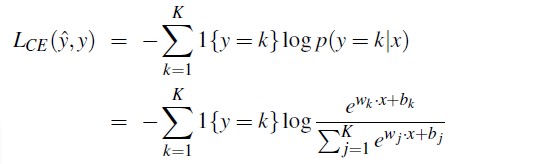

#### softmax derivation
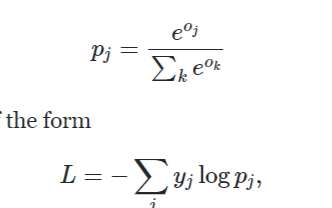


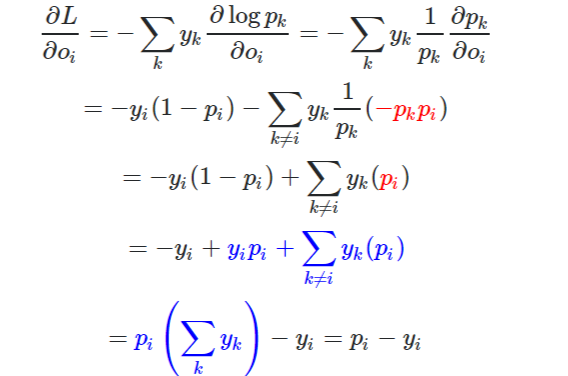

### 四、模型评价

#### 4.1 Accuracy

We generally don’t use it,especially when the goal is to discover something that is rare,because accuracy doesn't work well when the classes are unbalanced.

#### 4.2 Precision and Recall

Instead of accuracy,we generally turn to turn to two other metrics: precision and recall.They emphasize
true positives: finding the things that we are supposed to be looking for

Precision measures the percentage of the items that the system detected that are in fact positive

Precision = true positive / (true positive + false positive)

Recall measures the percentage of items actually present in the input that were correctly identified by the system.

recall = true positive / (true positive + false negatives) 

#### 4.3 More than two classes

将多分类拆成若干个二分类，比如有红黄蓝三个类别，则拆成红与非红，黄与非黄，蓝与非蓝，那么对于每个类别，就可以利用二分类的指标进行评估之后再进行平均，而平均又分为宏观平均与微观平均

In macroaveraging,we compute the performance for each class, and then average over classes.In microaveraging,we collect the decisions for all classes into a single contingency table, and then compute precision and recall from that table.

A microaverage is dominated by the more frequent class (in
this case spam), since the counts are pooled. The macroaverage better reflects the
statistics of the smaller classes, and so is more appropriate when performance on all
the classes is equally important.

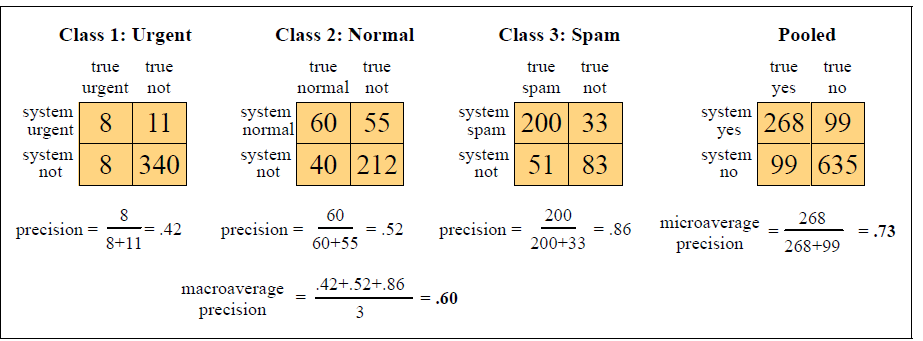

### 五、特征选择

#### 5.1 特征挑选
Features are generally designed by examining the training
set with an eye to linguistic intuitions and the linguistic literature on the domain. A
careful error analysis on the training set or devset of an early version of a system
often provides insights into features.

#### 5.2 特征组合
For some tasks it is especially helpful to build complex features that are combinations
of more primitive features.
For logistic regression and naive Bayes these combination features or feature interactions have to be designed by hand.
these are created automatically via feature templates,
In order to avoid the extensive human effort of feature design, recent research in
NLP has focused on representation learning: ways to learn features automatically
in an unsupervised way from the input.

### 参考资料
 Zellig S. Harris (1954) Distributional Structure, WORD, 10:2-3, 146-162, DOI:
10.1080/00437956.1954.11659520

https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function